In [ ]:
# necessary libraries imported
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# loading our CSV file
data = pd.read_csv('train_extended.csv')
data.head


<bound method NDFrame.head of             id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0            0   M  1.5750    1.2250  0.3750  31.226974       12.303683   
1            1   I  1.2375    1.0000  0.3750  21.885814        7.654365   
2            2   F  1.4500    1.1625  0.4125  28.250277       11.127179   
3            3   I  1.3500    1.0250  0.3750  21.588144        9.738053   
4            4   I  1.1375    0.8750  0.2875  14.968536        5.953395   
...        ...  ..     ...       ...     ...        ...             ...   
199995  199995   F  1.8125    1.2750  0.4375  42.141532       20.000572   
199996  199996   F  0.9875    0.6750  0.2375   7.980384        3.742134   
199997  199997   M  1.1250    0.9125  0.2875  10.886208        4.904464   
199998  199998   I  1.6250    1.2750  0.4125  33.891827       13.196692   
199999  199999   F  1.5875    1.2500  0.3875  34.373769       17.222321   

        Viscera Weight  Shell Weight   Age  
0             6.321938  

PRE-PROCESSING


In [3]:
# loading our CSV file
data = pd.read_csv('train_extended.csv')

# displaying the first few rows of the dataframe to understand the structure
print(data.head())

# checking for missing values and hadling them
print("Missing values before handling:")
print(data.isnull().sum())

# Example: Imputation of missing values with the mean of each column has been performed
data.fillna(data.mean(), inplace=True)

# Handling the categorical variables using one-hot encoding
# Example: In our dataset 'Sex' is a categorical variable
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

# Splitting the data into features (X) and target variable which is Age (y)
X = data.drop('Age', axis=1)
y = data['Age']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization of features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, X_train_scaled and X_test_scaled are the preprocessed feature sets, ready for regression models.

print(data.head())

   id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0   0   M  1.5750    1.2250  0.3750  31.226974       12.303683   
1   1   I  1.2375    1.0000  0.3750  21.885814        7.654365   
2   2   F  1.4500    1.1625  0.4125  28.250277       11.127179   
3   3   I  1.3500    1.0250  0.3750  21.588144        9.738053   
4   4   I  1.1375    0.8750  0.2875  14.968536        5.953395   

   Viscera Weight  Shell Weight   Age  
0        6.321938      9.638830  10.0  
1        3.798833      7.654365  19.0  
2        7.016501      7.257472  11.0  
3        4.110678      6.378637   9.0  
4        2.962523      3.713785   8.0  
Missing values before handling:
id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64


C:\Users\ANIKET DIXIT\AppData\Local\Temp\ipykernel_8268\3071448810.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


   id  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0   0  1.5750    1.2250  0.3750  31.226974       12.303683        6.321938   
1   1  1.2375    1.0000  0.3750  21.885814        7.654365        3.798833   
2   2  1.4500    1.1625  0.4125  28.250277       11.127179        7.016501   
3   3  1.3500    1.0250  0.3750  21.588144        9.738053        4.110678   
4   4  1.1375    0.8750  0.2875  14.968536        5.953395        2.962523   

   Shell Weight   Age  Sex_F  Sex_I  Sex_M  
0      9.638830  10.0      0      0      1  
1      7.654365  19.0      0      1      0  
2      7.257472  11.0      1      0      0  
3      6.378637   9.0      0      1      0  
4      3.713785   8.0      0      1      0  


IMPLEMENTATION OF REGRESSION MODELS


Model: Linear Regression
Mean Squared Error: 4.191100823972663
R-squared: 0.5950764387647919



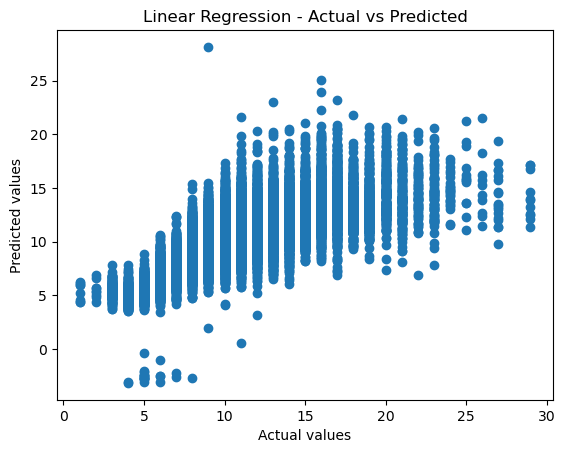

Model: Ridge Regression
Mean Squared Error: 4.1911024235447085
R-squared: 0.5950762842220032



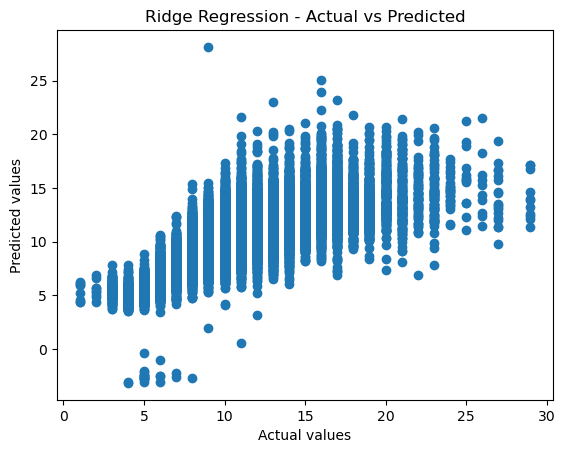

Model: Lasso Regression
Mean Squared Error: 6.484180614163335
R-squared: 0.3735303405345989



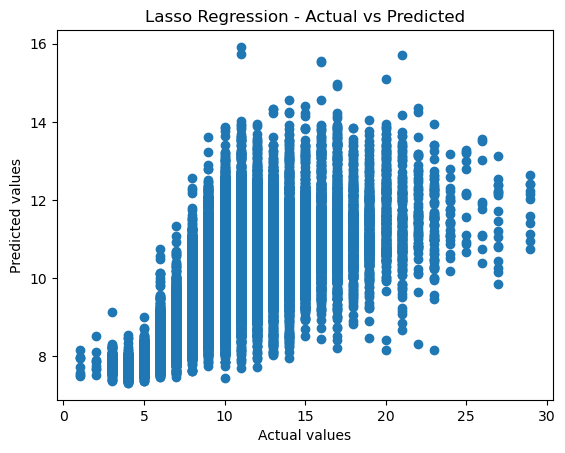

Model: Decision Tree Regression
Mean Squared Error: 7.997475
R-squared: 0.227323275220098



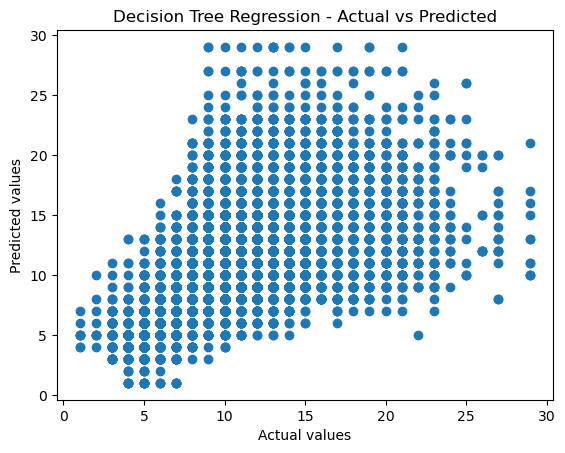

In [12]:
# defining the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor()
}

# training and evaluating each model
for name, model in models.items():
    # training the model
    model.fit(X_train_scaled, y_train)

    # making the predictions
    y_pred = model.predict(X_test_scaled)

    # evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # printing the required results
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print()

    # here, we have visualizec the results, for example, plot actual vs predicted values
    plt.scatter(y_test, y_pred)
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *
import numpy as np
from sklearn.linear_model import HuberRegressor


# loading your CSV file
data = pd.read_csv('train_extended.csv')

# Example preprocessing (replace with your own preprocessing steps)
X = data.drop('Age', axis=1)
y = data['Age']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor()
}

# Dictionary to store performance metrics
metrics = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    ev = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    medape = median_absolute_percentage_error(y_test, y_pred)
    max_err = max_error(y_test, y_pred)

    # Store metrics in the dictionary
    metrics[name] = {
        'Mean Squared Error': mse,
        'R-squared': r2,
        'Mean Absolute Error': mae,
        'Explained Variance': ev,
        'Mean Absolute Percentage Error': mape,
        'Root Mean Squared Log Error': rmsle,
        'Median Absolute Error': medae,
        'Median Absolute Percentage Error': medape,
        'Max Error': max_err
    }

# Print results
for name, metric_values in metrics.items():
    print(f"Model: {name}")
    for metric_name, value in metric_values.items():
        print(f"{metric_name}: {value}")
    print()


In [ ]:
#LINEAR REGRESSION
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, explained_variance_score, max_error, mean_squared_log_error
import numpy as np
import pandas as pd
data = pd.read_csv('train_extended.csv')
X = data.drop('Age', axis=1)
y = data['Age']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)


print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Median Absolute Error (MedAE): {medae:.2f}')
print(f'Explained Variance Score (EVS): {evs:.2f}')
print(f'Maximum Error: {max_err:.2f}')
print(f'Mean Squared Log Error (MSLE): {msle:.5f}')